<a href="https://colab.research.google.com/github/chacosa9/Traffic-Analysis/blob/main/CNN_Exercise(W4D3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [3]:
!kaggle datasets download -d saadpd/menwomen-classification

Dataset URL: https://www.kaggle.com/datasets/saadpd/menwomen-classification
License(s): copyright-authors
menwomen-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [5]:
import zipfile
with zipfile.ZipFile('menwomen-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [6]:
import os
os.listdir()

['.config',
 'menwomen-classification.zip',
 'traindata',
 'testdata',
 'sample_data']

In [11]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen_train.flow_from_directory('/content/traindata/traindata', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('/content/testdata/testdata', target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

Found 2891 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [10]:
# Data Augmentation
# Example:
datagen_train = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')



## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [1]:
#datagen.fit(train_generator)
#datagen.fit(validation_generator)


NameError: name 'datagen' is not defined

In [17]:
#Build the model
# Example:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D(2, 2),
   Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Flatten(),
   Dense(128, activation='relu'),
   Dropout(0.2),
   Dense(2, activation='softmax')
 ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [18]:
# Compile the model
# Example:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [19]:
# Train the model
# Example:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 66s 654ms/step - accuracy: 0.6032 - loss: 2.5375 - val_accuracy: 0.6868 - val_loss: 0.5718
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 78s 615ms/step - accuracy: 0.6538 - loss: 0.6197 - val_accuracy: 0.6755 - val_loss: 0.6084
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 82s 615ms/step - accuracy: 0.6786 - loss: 0.6082 - val_accuracy: 0.6792 - val_loss: 0.5830
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 61s 619ms/step - accuracy: 0.6693 - loss: 0.6028 - val_accuracy: 0.6906 - val_loss: 0.5777
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 80s 616ms/step - accuracy: 0.6711 - loss: 0.6135 - val_accuracy: 0.6830 - val_loss: 0.5927


## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [15]:
# Evaluate the model
# Example:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.7571 - loss: 0.5152
Validation Loss: 0.54342120885849
Validation Accuracy: 0.7283018827438354


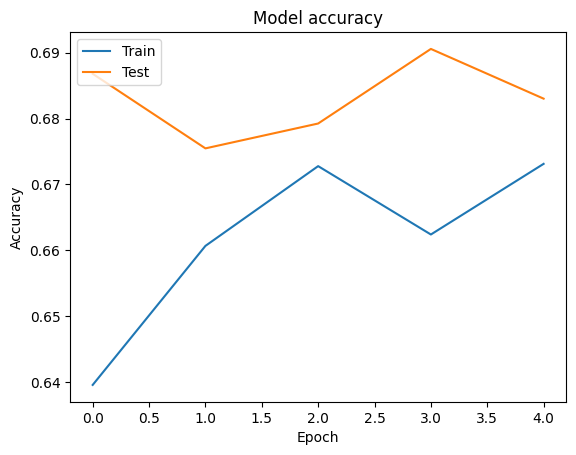

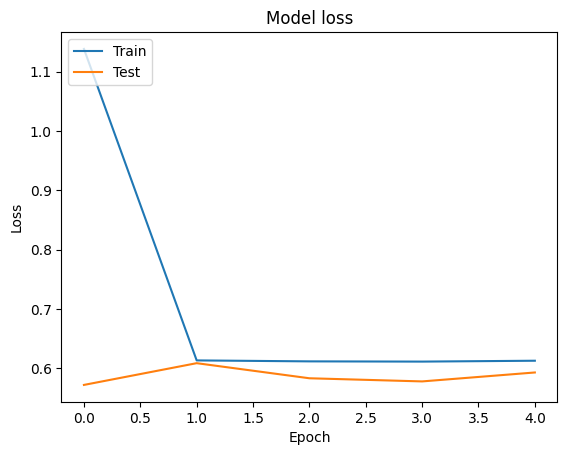

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Step 8: Save the Model
Finally, save your trained model for future use.

In [16]:
# Save the model
# Example:
model.save('my_cnn_model.h5')